# Classification: K-nearest-neighbours

Si vous vous rapplez du chapitre 2, le Machine Learning peut être utilisé pour deux tâches: la régression et la classification. Nous avons introduit la régression dans le chapitre précédent, il est donc temps de présenter la classification. 
L'approche la plus simple et intuitive est de partir du principe que les points de données de même catégorie se ressemblent. En partant de cette hypothèse, nous pouvons créer un modèle qui va commparer le point que nous souhaitons prédire ($x_{new}$) avec ceux qui sont déjà connu et aggréger les plus proches. 
C'est exactement ce que fait K-nearest-neighbours ("k voisins les plus proches"). Il va d'abord stocker les données d'entrainment avec leurs labels respectifs. Ensuite, lors de la prédiction, il va trouver les $k$ voisins les plus proches et aggréger leur labels respectifs. 

## K-nearest-neighbours

Il faudra résoudre plusieurs problèmes avant de pouvoir utiliser kNN. En effet, il faut déterminer le nombre de voisins ($k$) à prendre en compte, la façon de calculer les distances ainsi que la façon d'aggréger les voisins.

### Mesure de Distance
Nous pouvons utiliser n'importe quelle formule tel que l'Euclidienne (l2-norm), Manahttan (l1-norm) et plus. Le mesure la plus simple est la distance euclidienne qui calcule la distance dans l'espace cartésien.

$$distance(x_{new},x_n)=\sqrt{\sum_{a=1}^A(x_{new,a}-x_{n,a})^2}$$
$A$ représente tous les attributs.

Par facilité nous pouvons omettre la racine carrée et réecrire la formule en utilisant des vecteurs:

$$\begin{align}
    distance(x_{new},x_n)^2 &= \sum_{a=1}^A(x_{new,a}-x_{n,a})^2 \\
    &= \sum_{a=1}^A(x_{new,a}-x_{n,a})^T(x_{new,a}-x_{a,d}) \\
    &= (x_{new}-x_n)^T(x_{new}-x_n)
\end{align}$$

Cette formulation est la plus répendue et est pratique car les ordinateurs sont particulièrement performant dans le calcul vectoriel.

Il est aussi possible de calculer la distance dans un autre espace grâce aux kernels. Cependant, cette méthode ne sera pas expliqué dans ce module. 

> Vous aurez remarqué que la distance d'un point s'évalue sur base de la différence entre chaque attribut. C'est pour cette raison qu'il faut de préférence normaliser les données quand on utilise KNN. Imaginons que nous avons un attributs dont les valeurs se trouvet entre 0 et 1, et un autre entre -100 et 100. Le second attribut aura plus de poids dans la mesure de distance car il aura de plus grande valeurs comparé au premier. 
Par exemple nous avons deux point; (0.5, 50) et (0.45, 0). La distance entre les deux premier attributs est de $(0.5-0.45)²=0.0025$ et entre les deuxièmes $(50-0)²=2500$. Ils auront donc une distance de 2500.0025 entre les deux alors qu'ils sont très proche dans le premier attribut. 
La normalisation est encore plus importante quand on décide d'utiliser des poids lors de l'aggrégation

### Nombre de voisins

Maintenant que nous savons comment la distance sera mesurée il faut savoir combien de voisins nous devons prendre en compte. Pour voir les délimitations (bordures de décisions) entre 2 classes, nous pouvons créer un graphiques comme celui qui suit. Ce graphique présente les deux catégories ainsi que la bordure de décision. 

Nous pouvons voir que si nous utilisons 1 voisin, nous avons une poches dans les bleus où le point sera classifié comme orange. Utiliser 5 voisins semble suivre la forme de nos données alors qu'en utiliser plus linéarise la bordure. Bien que la meilleur façon de choisir le nombre de voisins en utilisants des mesures tel que l'accuracy ou le F1-score, créer un graphique nous permet de visualier la bordure et de comprendre le modèle.   

:::{figure-md} ks-fig
<img src="src/ks.png" alt="Influence du nombre de voisins sur la bordure de décision" width="750"/>

Influence du nombre de voisins sur la bordure de décision
:::

**Une image est présente pour montrer l'impact du nombre de voisins**

Il est dont primordial de déterminer le nombre obtimal de voision à prendre en compte. Le plus efficace et simple, et d'utiliser les données d'entrainement pour trouver ce nombre. Nous pouvons déterminer une liste de nombres des voisins, et d'entrainer chaque version avec l'ensemble d'entrainement et de l'évaluer sur l'ensemble de validation. La version du modèle la plus performante est celle que nous garderons. 

Un autre facteur déterminant est la balance des données. Si notre dataset d'entrainement n'est pas balancé et que nous avons 10 points qui sont de class 1 et 90 de class 2, utiliser un k > 10 va toujours prédire 2. 

### Agrégation des résultats
La dernière chose à déterminer est la façon dont on va aggréger les voisins. KNN est utilisé plus souvent dans les tâches de classification mais ce modèle peut aussi être utilisé pour de la régression.

#### Classification

La plus simple est d'attribuer la classe qui est la plus présente dans les voisins qui ont été selectionné. Dans certain cas, on voudra prendre la distance des voisins en compte. Il est possible que notre point soit collé a deux points d'une classe mais qu'il ait 3 voisins assez distant. Si nous utilisons la méthode précente, le point sera classifié comme appartenant à la même class que les trois points distant. Ce problème peut-être résolu en prenant la distance en compte. Pour ce faire, on attribue un poids à chaque vote, tel que l'inverse de la distance, les deux points proche auront l'avantage et notre nouveau point sera correctement classifié. 

#### Régression
Dans le cas de régression, nous prendrons la moyenne de chaque voisins. Dans ce cas nous pouvons aussi prendre la distance en compte. 

### Point Important
Nous savons que dans le cadre de la classification, KNN part du principe que les échantillons d'une même catégorie sont proche l'un de l'autre et que, idéalement, les données d'entrainement sont balancée. Un autre point important à prendre en compte est ce qu'on appel "la malédiction de la dimensionnalité". Le volume d'une espace de données augumente exponentielement avec le nombre d'attributs, ainsi nous avons besoin d'une quantité exponentielle d'échantillons, sinon nous aurons des espaces quasi vide et la distance entre chaque échantillon augumentera. KNN évalue la distance entre un point et un autre en fonction de la distance dans chaque attribut ($(x_{new,a}-x_{n,a})^2$), il sera donc de plus en plus difficile pour KNN de trouver les voisins correctement. 

## À retenir

- Lors de la classification, Knn part du principe que les échantillons de la même catégorie sont proches l'un de l'autre.
- KNN est un modèle assez simple mais qui est modulable afin de correspondre le plus possible à notre tâche.
- Il faut faire attention à la balance de l'ensemble d'entrainement. 
- Ce modèle peut-être utilisé pour la classification ainsi que la régression. 


## 4. Implémentation

Pour faciliter l'implémentation nous allons utiliser numpy. Nous allons aussi suivre l'architecture de scikit learn (Sklean), c'est à dire que notre modele possède une fonction **.fit** pour l'entrainer et **.predict** pour la prédiction. 

In [13]:
import numpy as np

'''
-- Création de l'ensemble de donnée --
Notez que j'utilise une distribution normal ce qui permet d'avoir tous les points d'une même class relativement proche.
De plus, je génère un ensemble balancé.
'''

elements = 50
random_state = 42
K = 5

def generate_data(elements, random_state):
    rng=np.random.RandomState(random_state)

    classes_x = rng.normal(0, 0.55, (2,elements))
    classes_y = rng.normal(1, 0.55, (2,elements))
    labels = np.concatenate((np.zeros(elements), np.ones(elements)))
    dset = np.zeros((2,elements*2))

    dset[0] = np.concatenate((classes_x[0], classes_y[0]))
    dset[1] = np.concatenate((classes_x[1], classes_y[1]))

    return dset, labels

'''
-- Implémentation du modèle --
'''

class KNN:
    def __init__(self, K):
        self.K = K
    

    def fit(self, data, labels):
        self.data = data
        self.labels = labels
    
    
    def predict(self, data_point):
        preds = []

        for dp in data_point:
            distances = []

            for point in self.data:
                distances.append(self.distance(dp, point)) 

            sorted_distances = np.argsort(distances)

            preds.append(np.bincount(self.labels[sorted_distances[:self.K]].astype(int)).argmax())
        
        return np.array(preds)
    

    def distance(self, x_new, x):
        return np.power(np.dot(x_new-x, x_new-x), 2)

Maintenant que nous avons un modèle et une méthode de génération de données, nous pouvons l'utiliser pour faire des prédictions. Nous allons générer 10 points de chaque classe. Vu que nous avons un ensemble blancé et binaire, nous pouvons utiliser l'accuracy. Cette mesure calcule le pourcentage de mauvaise prédiction.

In [14]:
# On génère les données d'entrainement et on "fit" le modèle
train_set, train_labels = generate_data(elements, random_state)

# Ensuite on le test en générant le set de test 
elements = 10
test_set, test_labels = generate_data(elements, random_state)
    
model = KNN(5)
model.fit(train_set.T, train_labels)

preds = model.predict(test_set.T)

print(np.sum(preds != test_labels)/len(test_labels))

0.1


Nous avons deux erreurs sur les 20 points, ce qui donne une accuracy de 0.1. C'est plutôt pas mal. Pour comprendre d'où elles viennent, nous pouvons tracer la bordure avec les points d'entrainements et de test. 

<!--
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

random_state = 42
rng=np.random.RandomState(random_state )

x1 = rng.normal(0, 0.55, 50)
y1 = rng.normal(0, 0.55, 50)

x2 = rng.normal(1, 0.55, 50)
y2 = rng.normal(1, 0.55, 50)

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
labels = np.concatenate((np.full(len(x1), 0), np.full(len(x2), 1)))

f, axis = plt.subplots(1, 4, sharey=True, figsize=(15,15))

line = 0

for ind, k in enumerate([1, 5, 10, 15]):
    
    if ind > 3:
        ind -= 4
        line = 1
        
    X = np.transpose(np.array([x,y]))
                        
    kNN = KNeighborsClassifier(k)
    kNN.fit(X, labels)

    np.transpose(X)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    #plt.figure()
    axis[ind].pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    axis[ind].scatter(X[:,0], X[:,1], c=labels, cmap=cmap_bold)
    axis[ind].set_xlim(xx.min(), xx.max())
    axis[ind].set_ylim(yy.min(), yy.max())
    axis[ind].set(aspect=1)
    axis[ind].set_title(f"k={k}")
    
plt.tight_layout()
plt.savefig("choix_des_k", bbox_inches='tight', pad_inches=0)
plt.show()
-->

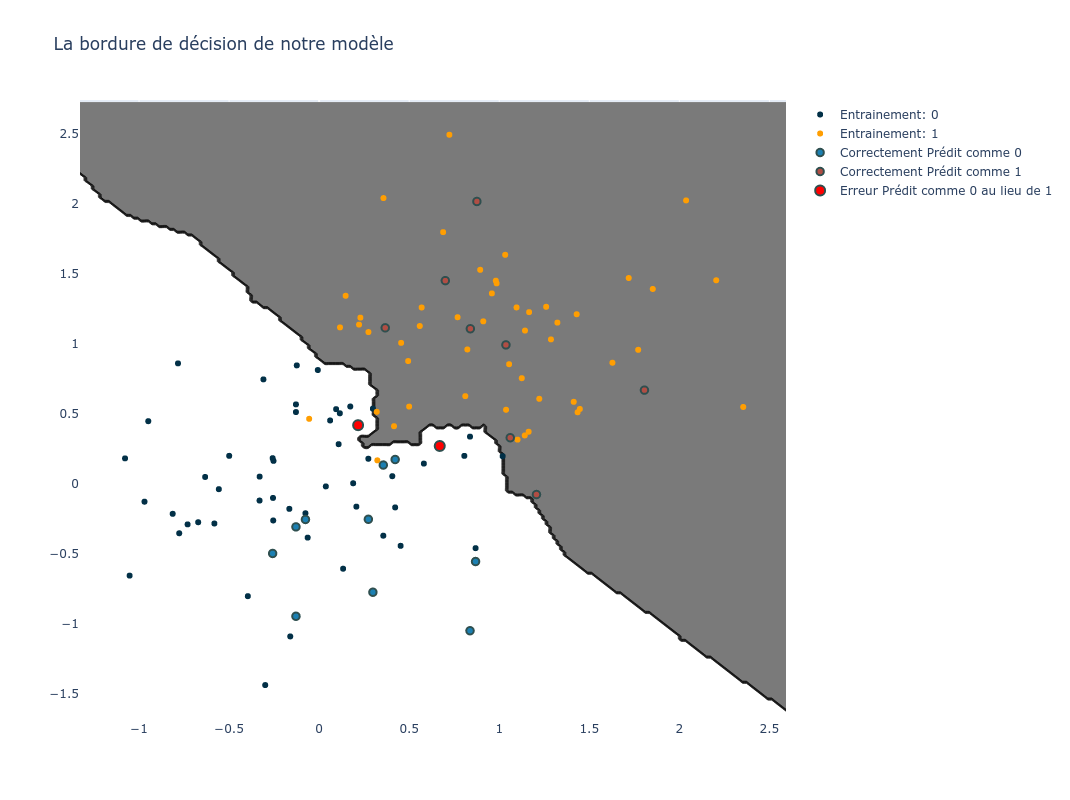

In [15]:
# Plot the figures
import plotly.express as px
import plotly.graph_objects as go

import kaleido

# Création du mesh pour voir la bordure de décision
mesh_size = .02
margin = 0.25

# Create a mesh grid on which we will run our model
x_min, x_max = train_set[0].min() - margin, train_set[0].max() + margin
y_min, y_max = train_set[1].min() - margin, train_set[1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Les couleurs pour la bordure
color_scale = [[0, "rgb(255, 255, 255)"], [1, "rgb(122, 122, 122)"]]

preds = model.predict(test_set.T)
preds[preds != test_labels] = -1    

Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()])).astype(str)
Z = Z.reshape(xx.shape)

fig = go.Figure()

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale=color_scale,
        showscale=False
    )
)

fig.add_trace(
    go.Scatter(x=train_set[0][train_labels == 0], y=train_set[1][train_labels==0], mode="markers",
      marker=dict(color="rgb(2,48,71)"), #showlegend = False,
       name="Entrainement: 0"
    )
)

fig.add_trace(
    go.Scatter(x=train_set[0][train_labels == 1], y=train_set[1][train_labels==1], mode="markers",
      marker=dict(color="rgb(255,158,2)"), #showlegend = False,
       name="Entrainement: 1"
    )
)

fig.add_trace(
    go.Scatter(x=test_set[0][preds == 0], y=test_set[1][preds==0], mode="markers",
      marker=dict(color="rgb(28,128,178)", size=7.5, line=dict(width=2, color='DarkSlateGrey')),
                  name="Correctement Prédit comme 0"
    )
)

fig.add_trace(
    go.Scatter(x=test_set[0][preds == 1], y=test_set[1][preds==1], mode="markers",
      marker=dict(color="rgb(176,78,68)", size=7.5, line=dict(width=2, color='DarkSlateGrey')),
                  name="Correctement Prédit comme 1"
    )
)

fig.add_trace(
    go.Scatter(x=test_set[0][preds == -1], y=test_set[1][preds==-1], mode="markers",
      marker=dict(color="rgb(255,0,0)", size=10, line=dict(width=2, color='DarkSlateGrey')),
                  name="Erreur Prédit comme 0 au lieu de 1"
    )
)

fig.update_layout(height=800, width=800, title_text="La bordure de décision de notre modèle")
fig.show()

Ce bout de code nous donne le graphique qui suit. Nous pouvons voir que que les deux erreurs sont de point qui devaient être des 1 mais sont des prédit comme étant des deux. On voit que c'est liée à la bordure de décision. On peut toujours adapter le nombre de voisins afin de réduire l'erreur mais il faut faire attention à l'overfitting!

:::{figure-md} model-fig
<img src="src/bordure_décision_knn.png" alt="Influence du nombre de voisins sur la bordure de décision" width="750"/>

Bordure de décision de notre modèle avec les données d'entrainements et de test.
:::

## Sources
- Cours "Algorithms for Machine Learning and Inference" de Chalmers University of Technology